In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from RLSVRD import RLSVRD as RLSVRD_regressor
from IRWLS_SVR import IRWLS_SVR

# 1D sinc test

In [3]:
def f(x):
    return 30 + np.sin(np.pi*x)/(np.pi*x)
def f_prime(x):
    return  (np.pi*x*np.cos(np.pi*x)-np.sin(np.pi*x))/x**2/np.pi

np.random.seed(0)
x_train = np.random.uniform(size = (10, 1), low = -7.0, high = 7.0)
x_prime_train = np.random.uniform(size = (8, 1), low = -7.0, high = 7.0)
y_train = f(x_train[:,0])
y_prime_train = f_prime(x_prime_train)

In [4]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.001

if len(x_train) > 0:
    regressor = SVR(C = C1, epsilon = epsilon, gamma = 1.0)
    regressor.fit(x_train, y_train)
    irwls = IRWLS_SVR(C = C1, epsilon = epsilon, gamma = 1.0)
    irwls.fit(x_train, y_train)
RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 1)
RLSVRD.fit(x_train, y_train, x_prime_train, y_prime_train, plot_matrices = False)

Converged after 6 iterations


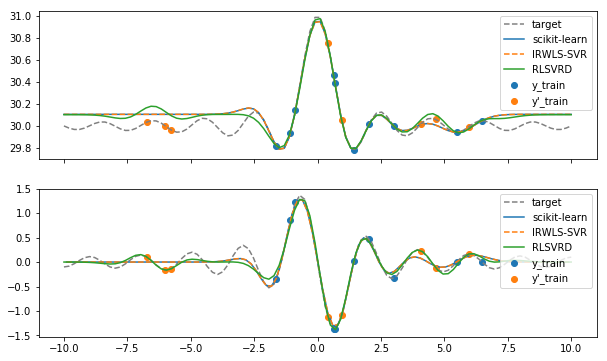

In [11]:
x = np.linspace(-10, 10, 100).reshape((100,1))
delta_x = x[1] - x[0]

fig, (ax0, ax1) = plt.subplots(nrows = 2, figsize = (10, 6), sharex=True)
ax0.scatter(x_train, y_train, label = "y_train")
ax0.scatter(x_prime_train, f(x_prime_train), label = "y'_train")
ax0.plot(x, f(x), "--", color = "0.5", label = "target")
if len(x_train) > 0:
    ax0.plot(x, regressor.predict(x), label = "scikit-learn")
    ax0.plot(x, irwls.predict(x), "--", label = "IRWLS-SVR")
ax0.plot(x, RLSVRD.predict(x), label = "RLSVRD")
ax0.legend(loc = 1)

ax1.scatter(x_train, f_prime(x_train), label = "y_train")
ax1.scatter(x_prime_train, y_prime_train, label = "y'_train")
ax1.plot(x, f_prime(x), "--", color = "0.5", label = "target")
if len(x_train) > 0:
    ax1.plot(x[1:] - 0.5*delta_x, np.diff(regressor.predict(x))/delta_x, label = "scikit-learn")
    ax1.plot(x[1:] - 0.5*delta_x, np.diff(irwls.predict(x))/delta_x, "--", label = "IRWLS-SVR")
ax1.plot(x, RLSVRD.predict_derivative(x), label = "RLSVRD")
ax1.legend(loc = 1)

# 2D function

In [12]:
def f_2d(x, y):
    return 30 + x*np.sin(y)
def f_2d_dx(x, y):
    return  np.sin(y)
def f_2d_dy(x, y):
    return  x*np.cos(y)

x_2d_train = np.random.uniform(size = (50, 2), low = -3.0, high = 3.0)
y_2d_train = f_2d(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dx_train = f_2d_dx(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dy_train = f_2d_dy(x_2d_train[:,0], x_2d_train[:,1])

In [13]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.01

if len(x_2d_train) > 0:
    regressor = SVR(C = C1, epsilon = epsilon, gamma = 1.0)
    regressor.fit(x_2d_train, y_2d_train)
    irwls = IRWLS_SVR(C = C1, epsilon = epsilon, gamma = 1.0)
    irwls.fit(x_2d_train, y_2d_train)
RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 1)
RLSVRD.fit(x_2d_train, y_2d_train, x_2d_train, np.array([y_2d_dx_train, y_2d_dy_train]).T, plot_matrices = False)

Converged after 9 iterations


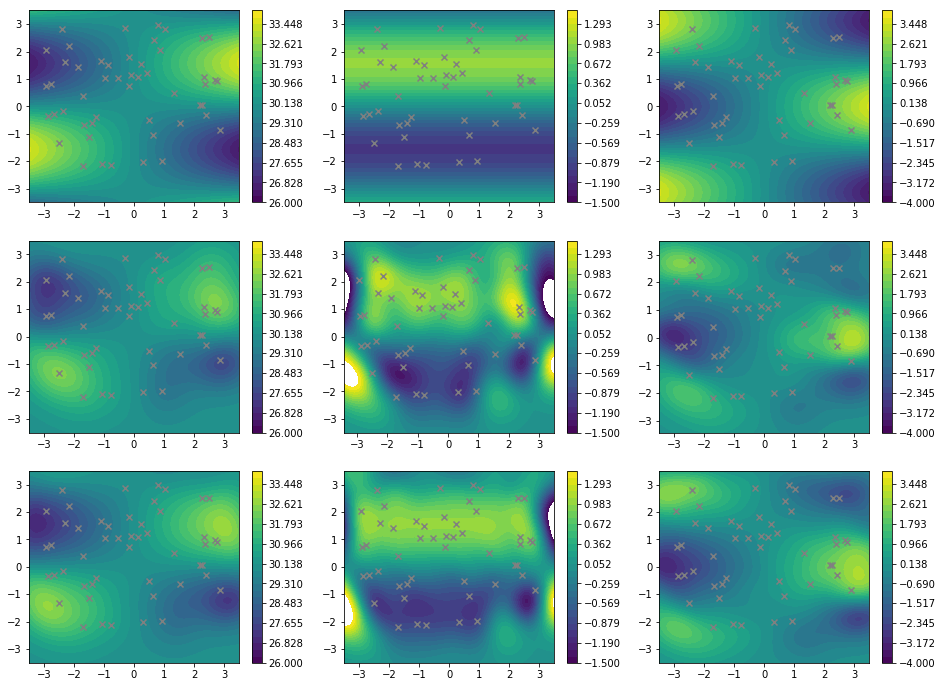

In [14]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(ncols=3, nrows=3, figsize = (16,12))
x, y = np.linspace(-3.5, 3.5, 100), np.linspace(-3.5, 3.5, 100)
delta_x = x[1] - x[0]
delta_y = y[1] - y[0]
xx, yy = np.meshgrid(x, y)
p = ax0.contourf(xx, yy, f_2d(xx, yy), levels = np.linspace(26.0, 34.0, 30))
fig.colorbar(p, ax = ax0)
ax0.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax1.contourf(xx, yy, f_2d_dx(xx, yy), levels = np.linspace(-1.5, 1.5, 30))
ax1.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
fig.colorbar(p, ax = ax1)
p = ax2.contourf(xx, yy, f_2d_dy(xx, yy), levels = np.linspace(-4, 4, 30))
fig.colorbar(p, ax = ax2)
ax2.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")

p = ax3.contourf(xx, yy, regressor.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), levels = np.linspace(26.0, 34.0, 30))
fig.colorbar(p, ax = ax3)
ax3.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax4.contourf(xx[:,1:], yy[:,1:], np.diff(regressor.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), axis = 1)/delta_x, 
                 levels = np.linspace(-1.5, 1.5, 30))
fig.colorbar(p, ax = ax4)
ax4.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax5.contourf(xx[1:,:], yy[1:,:], np.diff(regressor.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), axis = 0)/delta_y, 
                 levels = np.linspace(-4, 4, 30))
fig.colorbar(p, ax = ax5)
ax5.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")


p = ax6.contourf(xx, yy, RLSVRD.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), levels = np.linspace(26.0, 34.0, 30))
fig.colorbar(p, ax = ax6)
ax6.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax7.contourf(xx, yy, RLSVRD.predict_derivative(np.stack([xx.flatten(), yy.flatten()], axis = 1))[:,0].reshape(100, 100), levels = np.linspace(-1.5, 1.5, 30))
fig.colorbar(p, ax = ax7)
ax7.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax8.contourf(xx, yy, RLSVRD.predict_derivative(np.stack([xx.flatten(), yy.flatten()], axis = 1))[:,1].reshape(100, 100), levels = np.linspace(-4, 4, 30))
fig.colorbar(p, ax = ax8)
ax8.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")

array([-0.10625778,  0.54133278, -0.13877033,  1.55968391,  1.53300869,
        0.87763291,  0.52251838,  0.57576947, -0.71862105,  0.23084042,
       -3.33766693,  0.22302837,  0.48451022,  1.0102084 , -0.01211423,
        0.09305945, -0.68768349, -0.06805757, -1.05101829, -1.10247743,
       -0.22428353,  0.59629926, -0.85477711, -0.03911654, -0.01341985,
        1.97137592, -0.37954361, -0.08051049,  0.29461064,  0.2371174 ,
        0.85100645,  0.5499593 ,  0.65037542,  0.27241895, -1.96525061,
       -0.48418783,  0.17718204,  0.54120783, -1.00303811,  0.11592479,
       -0.0619914 , -0.44082441, -0.6030553 ,  0.27365222, -0.06864623,
        0.41444055,  0.61059455, -1.28657507, -0.3882232 , -0.09164793])